# German Cities

Date: 2024/01/14 - 2024/01/15, 2024/03/19 - 2024/03/20, 2024/04/19(SQLite)

The final list I want to create:

```
+-------+----------+-----------+--------+-------+
| place | latitude | longitude | counts | order |
+-------+----------+-----------+--------+-------+
|       |          |           |        |       |
                :       :
|       |          |           |        |       |
+-------+----------+-----------+--------+-------+
```

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_trf')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


'NoneType' object has no attribute 'cadam32bit_grad_fp32'


In [2]:
import yaml

with open('../data/pg35041-paragraphs.yaml', 'r', encoding='utf-8') as f:
    paragraphs = yaml.safe_load(f.read())

## Listing up locations in the book

In [3]:
places = []
for doc in nlp.pipe(paragraphs):
    for ent in doc.ents:
        if ent.label_ == 'GPE':
            places.append(ent.text)
places

['Pressburg',
 'Hungary',
 'Thuringia',
 'Wechmar',
 'Gotha',
 'Thuringia',
 'Schwarzburg-Arnstadt',
 'Italy',
 'Thuringia',
 'Germany',
 'Erfurt',
 'Eisenach',
 'Arnstadt',
 'Thuringia',
 'Franconia',
 'Germany',
 'Vienna',
 'Eisenach',
 'Arnstadt',
 'Lüneburg',
 'Danzig',
 'Lüeburg',
 'Hamburg',
 'Celle',
 'Lüneburg',
 'Weimar',
 'Arnstadt',
 'Weimar',
 'Arnstadt',
 'Lübeck',
 'Arnstadt',
 'Mühlhausen',
 'Weimar',
 'Weimar',
 'Weimar',
 'Halle',
 'Halleand',
 'Dresden',
 'Dresden',
 'Weimar',
 'Dresden',
 'Dresden',
 'Weimar',
 'Anhalt-Cöthen',
 'visitedHamburg',
 'Leipzig',
 'Anhalt-Cöthen',
 'Weissenfels',
 'Prussia',
 'Potsdam',
 'Potsdam',
 'Potsdam',
 'Potsdam',
 'Leipzig',
 'Potsdam',
 'London',
 'Leipzig',
 'Leipzig',
 'Leipzig',
 'Leipzig',
 'Leipzig',
 'Leipzig',
 'Dresden',
 'Leipzig',
 'Leipzig',
 'Leipzig',
 'Leipzig',
 'Leipzig',
 'Leipzig',
 'Leipzig',
 'Leipzig',
 'Saxony',
 'Sicily',
 'Spain',
 'Leipzig',
 'Leipzig',
 'Leipzig',
 'Dresden',
 'Erfurt',
 'Mainz',
 'Erfu

In [4]:
import collections

place_freq = collections.Counter(places)
place_freq

Counter({'Leipzig': 29,
         'Dresden': 11,
         'Weimar': 10,
         'Arnstadt': 5,
         'Potsdam': 5,
         'Thuringia': 4,
         'Germany': 4,
         'Berlin': 4,
         'Erfurt': 3,
         'Halle': 3,
         'Cöthen': 3,
         'Eisenach': 2,
         'Lüneburg': 2,
         'Hamburg': 2,
         'Anhalt-Cöthen': 2,
         'Weissenfels': 2,
         'Prussia': 2,
         'London': 2,
         'Saxony': 2,
         'Pressburg': 1,
         'Hungary': 1,
         'Wechmar': 1,
         'Gotha': 1,
         'Schwarzburg-Arnstadt': 1,
         'Italy': 1,
         'Franconia': 1,
         'Vienna': 1,
         'Danzig': 1,
         'Lüeburg': 1,
         'Celle': 1,
         'Lübeck': 1,
         'Mühlhausen': 1,
         'Halleand': 1,
         'visitedHamburg': 1,
         'Sicily': 1,
         'Spain': 1,
         'Mainz': 1,
         'Poland': 1,
         'Brunswick': 1,
         'England': 1,
         'MS': 1})

In [5]:
place_freq_sorted = place_freq.most_common()
place_freq_sorted

[('Leipzig', 29),
 ('Dresden', 11),
 ('Weimar', 10),
 ('Arnstadt', 5),
 ('Potsdam', 5),
 ('Thuringia', 4),
 ('Germany', 4),
 ('Berlin', 4),
 ('Erfurt', 3),
 ('Halle', 3),
 ('Cöthen', 3),
 ('Eisenach', 2),
 ('Lüneburg', 2),
 ('Hamburg', 2),
 ('Anhalt-Cöthen', 2),
 ('Weissenfels', 2),
 ('Prussia', 2),
 ('London', 2),
 ('Saxony', 2),
 ('Pressburg', 1),
 ('Hungary', 1),
 ('Wechmar', 1),
 ('Gotha', 1),
 ('Schwarzburg-Arnstadt', 1),
 ('Italy', 1),
 ('Franconia', 1),
 ('Vienna', 1),
 ('Danzig', 1),
 ('Lüeburg', 1),
 ('Celle', 1),
 ('Lübeck', 1),
 ('Mühlhausen', 1),
 ('Halleand', 1),
 ('visitedHamburg', 1),
 ('Sicily', 1),
 ('Spain', 1),
 ('Mainz', 1),
 ('Poland', 1),
 ('Brunswick', 1),
 ('England', 1),
 ('MS', 1)]

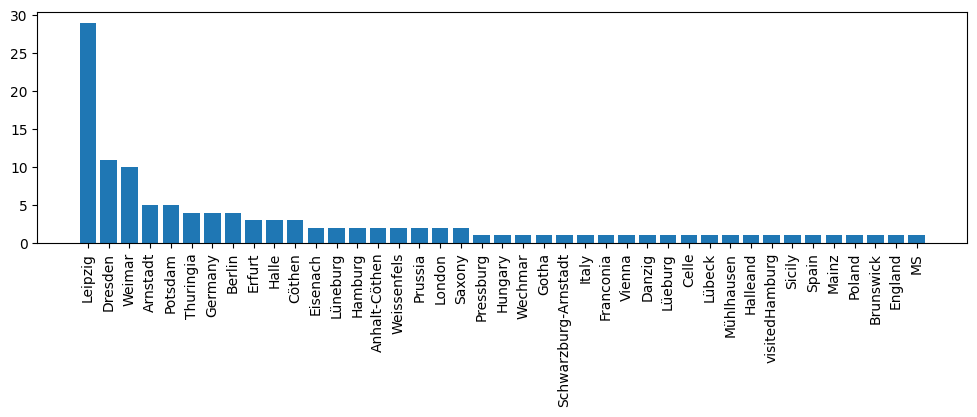

In [6]:
place_keys = [v[0] for v in place_freq_sorted]
place_values = [v[1] for v in place_freq_sorted]
fig, ax = plt.subplots(figsize=(12,3))
ax.bar(place_keys, place_values)
plt.xticks(rotation=90)
plt.show()

In [7]:
# Reference: https://stackoverflow.com/questions/13686001/python-module-for-getting-latitude-and-longitude-from-the-name-of-a-us-city
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="bach_network(1)")
place_geolocation = []
for place in place_keys:
    address=geolocator.geocode(place)
    if address is None:
        print(place)
    else:
        place_geolocation.append([place, address.latitude, address.longitude])

place_geolocation

Schwarzburg-Arnstadt
Lüeburg
Halleand
visitedHamburg


[['Leipzig', 51.3406321, 12.3747329],
 ['Dresden', 51.0493286, 13.7381437],
 ['Weimar', 50.9810486, 11.3296637],
 ['Arnstadt', 50.8349097, 10.9461479],
 ['Potsdam', 52.4009309, 13.0591397],
 ['Thuringia', 50.9014721, 11.0377839],
 ['Germany', 51.1638175, 10.4478313],
 ['Berlin', 52.5170365, 13.3888599],
 ['Erfurt', 50.9777974, 11.0287364],
 ['Halle', 51.4825041, 11.9705452],
 ['Cöthen', 52.793057, 13.9355243],
 ['Eisenach', 50.9747134, 10.3193565],
 ['Lüneburg', 53.248706, 10.407855],
 ['Hamburg', 53.550341, 10.000654],
 ['Anhalt-Cöthen', 51.751033, 11.973698],
 ['Weissenfels', 51.1999793, 11.9667857],
 ['Prussia', 41.3738765, -94.506357],
 ['London', 51.4893335, -0.14405508452768728],
 ['Saxony', 50.9295798, 13.4585052],
 ['Pressburg', 48.15926025, 17.139658691421687],
 ['Hungary', 47.1817585, 19.5060937],
 ['Wechmar', 50.8916042, 10.7779129],
 ['Gotha', 50.9494849, 10.7014435],
 ['Italy', 42.6384261, 12.674297],
 ['Franconia', 44.2273919, -71.7478468],
 ['Vienna', 48.2083537, 16.3725

- "Lüeburg" is misspelled, and it must be Lüeneburg
- "Halleand" must be "Halle and"
- "visitedHamburug" must be "visited Hamburug"

## Statistics

- Anhalt-Cöthen and Cöthen is identical.
- Schwarzburg-Arnstadt and Arnstadt is identical.

In [8]:
GERMAN_CITIES_REPLACE = {
    "Anhalt-Cöthen": "Anhalt-Köthen",
    "Arnstadt": "Schwarzburg-Arnstadt",
    "Lüeburg": "Lüneburg",
    "Halleand": "Halle",
    "visitedHamburg": "Hamburg",
    "Brunswick": "Braunschweig",  # Replace it with its German name
    "Cöthen": "Anhalt-Köthen"
}

In [9]:
german_cities = {'Leipzig': 29,
         'Dresden': 11,
         'Weimar': 10,
         'Arnstadt': 5,
         'Potsdam': 5,
         'Berlin': 4,
         'Erfurt': 3,
         'Halle': 3,
         'Cöthen': 3,
         'Eisenach': 2,
         'Lüneburg': 2,
         'Hamburg': 2,
         'Anhalt-Cöthen': 2,
         'Weissenfels': 2,
         'Wechmar': 1,
         'Gotha': 1,
         'Schwarzburg-Arnstadt': 1,
         'Lüeburg': 1,
         'Celle': 1,
         'Lübeck': 1,
         'Mühlhausen': 1,
         'Halleand': 1,
         'visitedHamburg': 1,
         'Mainz': 1,
         'Brunswick': 1}

GERMAN_CITIES = german_cities.keys()
list(GERMAN_CITIES)

['Leipzig',
 'Dresden',
 'Weimar',
 'Arnstadt',
 'Potsdam',
 'Berlin',
 'Erfurt',
 'Halle',
 'Cöthen',
 'Eisenach',
 'Lüneburg',
 'Hamburg',
 'Anhalt-Cöthen',
 'Weissenfels',
 'Wechmar',
 'Gotha',
 'Schwarzburg-Arnstadt',
 'Lüeburg',
 'Celle',
 'Lübeck',
 'Mühlhausen',
 'Halleand',
 'visitedHamburg',
 'Mainz',
 'Brunswick']

In [10]:
import copy
german_cities_ = copy.copy(german_cities)

for k, v in german_cities.items():
    if k in GERMAN_CITIES_REPLACE:
        kk = GERMAN_CITIES_REPLACE[k]
        if kk in german_cities_:
            german_cities_[kk] += german_cities[k]
        else:
            german_cities_[kk] = german_cities[k]
            
        del german_cities_[k]

german_cities_

{'Leipzig': 29,
 'Dresden': 11,
 'Weimar': 10,
 'Potsdam': 5,
 'Berlin': 4,
 'Erfurt': 3,
 'Halle': 4,
 'Eisenach': 2,
 'Lüneburg': 3,
 'Hamburg': 3,
 'Weissenfels': 2,
 'Wechmar': 1,
 'Gotha': 1,
 'Schwarzburg-Arnstadt': 6,
 'Celle': 1,
 'Lübeck': 1,
 'Mühlhausen': 1,
 'Mainz': 1,
 'Anhalt-Köthen': 5,
 'Braunschweig': 1}

In [11]:
import pandas as pd
df = pd.DataFrame(list(german_cities_.items()), columns=['place', 'counts']).sort_values('counts', ascending=False)
df['latitude'] = np.nan
df['longitude'] = np.nan
df

,place,counts,latitude,longitude
0,Leipzig,29,NaN,NaN
1,Dresden,11,NaN,NaN
2,Weimar,10,NaN,NaN
13,Schwarzburg-Arnstadt,6,NaN,NaN
3,Potsdam,5,NaN,NaN
18,Anhalt-Köthen,5,NaN,NaN
4,Berlin,4,NaN,NaN
6,Halle,4,NaN,NaN
5,Erfurt,3,NaN,NaN
8,Lüneburg,3,NaN,NaN


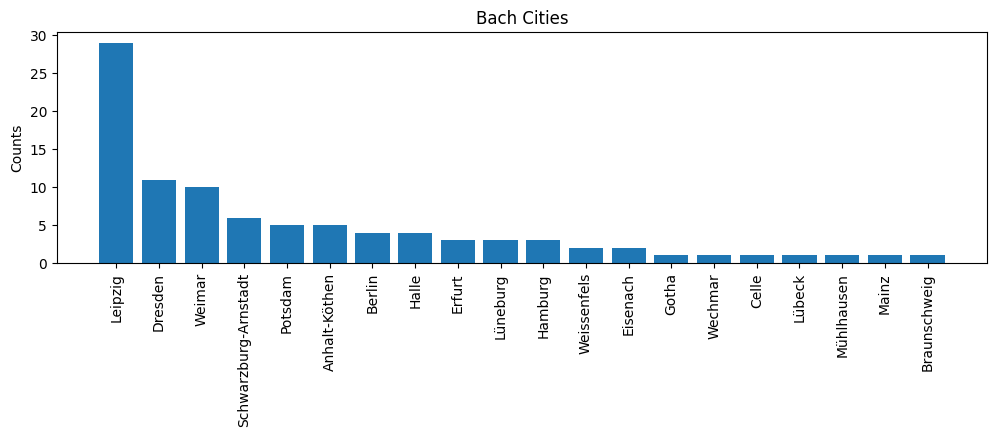

In [12]:
fig, ax = plt.subplots(figsize=(12,3))
ax.bar(df.place, df.counts)
ax.set_ylabel('Counts')
plt.xticks(rotation=90)
plt.title('Bach Cities')
plt.show()

In [13]:
geolocator = Nominatim(user_agent="bach_network(10)")

for place in df.place:
    address=geolocator.geocode(place)
    if address is not None:
        df.loc[df.place == place, 'latitude'] = address.latitude
        df.loc[df.place == place, 'longitude'] = address.longitude

In [14]:
# Correcting the results from Nominatim
df.loc[df.place=='Schwarzburg-Arnstadt', 'latitude'] = 50.83421021524258
df.loc[df.place=='Schwarzburg-Arnstadt', 'longitude'] = 10.946181282168581
df

,place,counts,latitude,longitude
0,Leipzig,29,51.340632,12.374733
1,Dresden,11,51.049329,13.738144
2,Weimar,10,50.981049,11.329664
13,Schwarzburg-Arnstadt,6,50.834210,10.946181
3,Potsdam,5,52.400931,13.059140
18,Anhalt-Köthen,5,51.751033,11.973698
4,Berlin,4,52.517037,13.388860
6,Halle,4,51.482504,11.970545
5,Erfurt,3,50.977797,11.028736
8,Lüneburg,3,53.248706,10.407855


In [15]:
places_data = [[row['place'], row['counts'], row['latitude'], row['longitude']] for _, row in df.iterrows()]

In [16]:
with open('../docs/data/places.js', 'w', encoding='utf-8') as f:
    f.write(f'const places = {places_data};')

## Place Appearance Order

In [17]:
idx = 0
place_order = {}
for p in places:
    if p in GERMAN_CITIES_REPLACE:
        p = GERMAN_CITIES_REPLACE[p]
    if p in german_cities and p not in place_order:
        place_order[p] = idx
    idx += 1
    
place_order = dict(sorted(place_order.items(), key=lambda item: item[1]))
list(place_order.keys())

['Wechmar',
 'Gotha',
 'Schwarzburg-Arnstadt',
 'Erfurt',
 'Eisenach',
 'Lüneburg',
 'Hamburg',
 'Celle',
 'Weimar',
 'Lübeck',
 'Mühlhausen',
 'Halle',
 'Dresden',
 'Leipzig',
 'Weissenfels',
 'Potsdam',
 'Mainz',
 'Berlin']

## Export data

In [18]:
import sqlite3
import pandas as pd

cities = pd.Series(list(GERMAN_CITIES), name='name')
cities_replace = pd.DataFrame({'original': GERMAN_CITIES_REPLACE.keys(), 'replace': GERMAN_CITIES_REPLACE.values()})
with sqlite3.connect('../data/bach.db') as conn:
    cities.to_sql('cities', conn, if_exists='replace')    
    cities_replace.to_sql('cities_replace', conn, if_exists='replace')